In [1]:
import pandas as pd
import pathlib

PROJECT_ROOT = (pathlib.Path().parent / "..").resolve()

"""
Dataset dictionary
==================

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)
"""


dataset = pd.read_csv(PROJECT_ROOT / "ds_engr" / "creditcard.csv")
dataset.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  23999.000000    23999.000000  23999.000000  23999.000000  23999.000000   
mean   12000.000000   165498.715780      1.628276      1.847452      1.557232   
std     6928.058891   129130.743065      0.483275      0.780004      0.522083   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     6000.500000    50000.000000      1.000000      1.000000      1.000000   
50%    12000.000000   140000.000000      2.000000      2.000000      2.000000   
75%    17999.500000   240000.000000      2.000000      2.000000      2.000000   
max    23999.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean      35.380849     -0.001667     -0.123463     -0.154756     -0.211675   
std        9.271046      1.127136      1.200591      1.204058      1.166573   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   23999.000000   23999.000000   23999.000000   23999.000000   
mean   ...   42369.872828   40002.333097   38565.266636    5543.098046   
std    ...   63071.455167   60345.728280   59156.501143   15068.862730   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2340.500000    1740.000000    1235.000000    1000.000000   
50%    ...   18941.000000   18108.000000   17038.000000    2100.000000   
75%    ...   52190.000000   49750.000000   48796.500000    5000.000000   
max    ...  891586.000000  927171.000000  961664.000000  505000.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.399900e+04   23999.000000   23999.000000   23999.000000   
mean   5.815529e+03    4969.431393    4743.656861    4783.643693   
std    2.079744e+04   16095.929295   14883.554872   15270.703904   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.000000e+02     379.000000     279.500000     244.000000   
50%    2.000000e+03    1703.000000    1500.000000    1500.000000   
75%    5.000000e+03    4347.500000    4000.000000    4005.000000   
max    1.684259e+06  896040.000000  497000.000000  417990.000000   

            PAY_AMT6  default payment next month  
count   23999.000000                23999.000000  
mean     5189.573607                    0.223718  
std     17630.718575                    0.416744  
min         0.000000                    0.000000  
25%        60.500000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [2]:
# Split the data into features and target label
features = dataset.drop("default payment next month", axis=1)
target = dataset["default payment next month"]

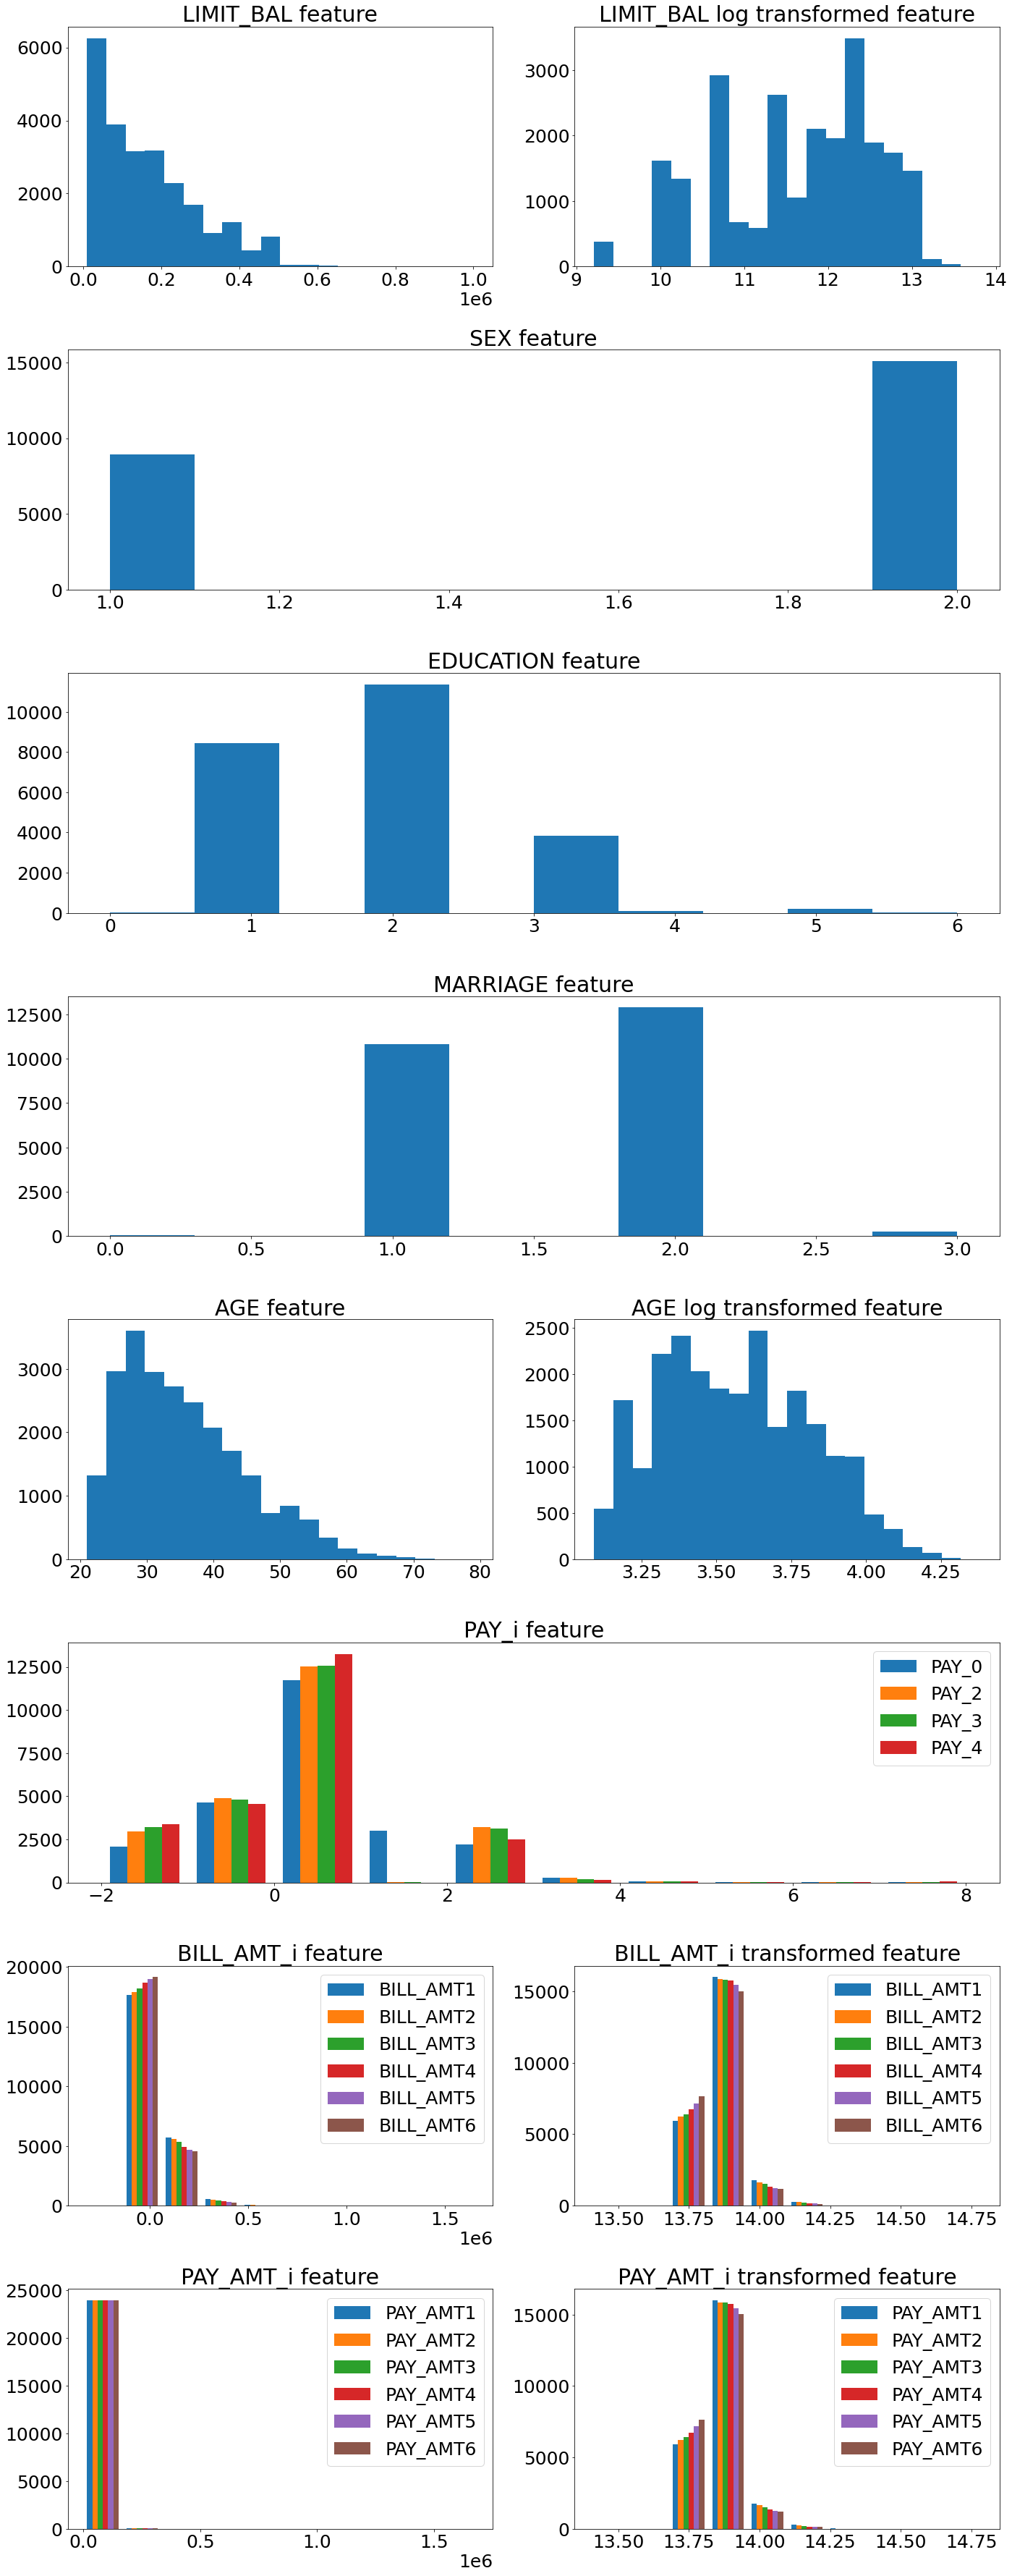

In [3]:
# Visualize all features and define if needed to normalize
import matplotlib.pyplot as plt
import numpy as np


limit_balance = features["LIMIT_BAL"]
sex = features["SEX"]
edu = features["EDUCATION"]
marriage = features["MARRIAGE"]
age = features["AGE"]
pay_features = features[[f"PAY_{i}" for i in (0, 2, 3, 4)]]
bill_amt_features = features[[f"BILL_AMT{i}" for i in (1, 2, 3, 4, 5, 6)]]
pay_amt_features = features[[f"PAY_AMT{i}" for i in (1, 2, 3, 4, 5, 6)]]

plt.rcParams["font.size"] = "25"
fig = plt.figure(figsize=(20, 50))
gs = fig.add_gridspec(8, 2)

limit_bal_ax = fig.add_subplot(gs[0, :-1])
limit_bal_ax.hist(limit_balance, bins=20)
limit_bal_ax.set_title("LIMIT_BAL feature")
# log transform limit balance
limit_balance_trf = np.log(limit_balance + 1)
limit_bal_trf_ax = fig.add_subplot(gs[0, -1:])
limit_bal_trf_ax.hist(limit_balance_trf, bins=20)
limit_bal_trf_ax.set_title("LIMIT_BAL log transformed feature")

sex_ax = fig.add_subplot(gs[1, :])
sex_ax.hist(sex)
sex_ax.set_title("SEX feature")

edu_ax = fig.add_subplot(gs[2, :])
edu_ax.hist(edu)
edu_ax.set_title("EDUCATION feature")

mar_ax = fig.add_subplot(gs[3, :])
mar_ax.hist(marriage)
mar_ax.set_title("MARRIAGE feature")

age_ax = fig.add_subplot(gs[4, :-1])
age_ax.hist(age, bins=20)
age_ax.set_title("AGE feature")
age_trf = np.log(age + 1)
age_trf_ax = fig.add_subplot(gs[4, -1:])
age_trf_ax.hist(age_trf, bins=20)
age_trf_ax.set_title("AGE log transformed feature")

pay_ax = fig.add_subplot(gs[5, :])
pay_ax.hist(pay_features)
pay_ax.set_title("PAY_i feature")
pay_ax.legend([f"PAY_{i}" for i in (0, 2, 3, 4)])

bill_amt_ax = fig.add_subplot(gs[6, :-1])
bill_amt_ax.hist(bill_amt_features)
bill_amt_ax.set_title("BILL_AMT_i feature")
bill_amt_ax.legend([f"BILL_AMT{i}" for i in (1, 2, 3, 4, 5, 6)])
bill_amt_trf_features = np.log(bill_amt_features + 1000000)
bill_amt_trf_ax = fig.add_subplot(gs[6, -1:])
bill_amt_trf_ax.hist(bill_amt_trf_features)
bill_amt_trf_ax.set_title("BILL_AMT_i transformed feature")
bill_amt_trf_ax.legend([f"BILL_AMT{i}" for i in (1, 2, 3, 4, 5, 6)])

pay_amt_ax = fig.add_subplot(gs[7, :-1])
pay_amt_ax.hist(pay_amt_features)
pay_amt_ax.set_title("PAY_AMT_i feature")
pay_amt_ax.legend([f"PAY_AMT{i}" for i in (1, 2, 3, 4, 5, 6)])
pay_amt_trf_features = np.log(pay_amt_features + 1)
pay_amt_trf_ax = fig.add_subplot(gs[7, -1:])
pay_amt_trf_ax.hist(bill_amt_trf_features)
pay_amt_trf_ax.set_title("PAY_AMT_i transformed feature")
pay_amt_trf_ax.legend([f"PAY_AMT{i}" for i in (1, 2, 3, 4, 5, 6)])
 
plt.tight_layout()

In [4]:
# Apply log normalization to skewed distributions, then normalize the data to 0..1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
features_1 = features.copy()


features_1[["LIMIT_BAL", "AGE"]] = np.log(features_1[["LIMIT_BAL", "AGE"]] + 1)
features_1[[
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]] = np.log(features_1[[
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]] + 1000000)
features_1[[
    "LIMIT_BAL", "AGE", 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]] = min_max_scaler.fit_transform(features_1[[
    "LIMIT_BAL", "AGE", 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]])
features_1.describe()

ID     LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean   12000.000000      0.529678      1.628276      1.847452      1.557232   
std     6928.058891      0.204140      0.483275      0.780004      0.522083   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%     6000.500000      0.349475      1.000000      1.000000      1.000000   
50%    12000.000000      0.573056      2.000000      2.000000      2.000000   
75%    17999.500000      0.690100      2.000000      2.000000      2.000000   
max    23999.000000      1.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean       0.365715     -0.001667     -0.123463     -0.154756     -0.211675   
std        0.190759      1.127136      1.200591      1.204058      1.166573   
min        0.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        0.213987     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.359652      0.000000      0.000000      0.000000      0.000000   
75%        0.500879      0.000000      0.000000      0.000000      0.000000   
max        1.000000      8.000000      8.000000      8.000000      8.000000   

       ...     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6  \
count  ...  23999.000000  23999.000000  23999.000000  23999.000000   
mean   ...      0.186386      0.274559      0.165378      0.414507   
std    ...      0.052273      0.068324      0.072948      0.048821   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.151067      0.229036      0.116848      0.382241   
50%    ...      0.165898      0.248977      0.138724      0.396625   
75%    ...      0.198712      0.287957      0.180034      0.424869   
max    ...      1.000000      1.000000      1.000000      1.000000   

           PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean       0.013273      0.005704      0.007573      0.011483      0.013366   
std        0.034134      0.017586      0.022675      0.034096      0.040390   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.002445      0.000810      0.000592      0.000693      0.000699   
50%        0.005132      0.002023      0.002660      0.003715      0.004292   
75%        0.012201      0.005051      0.006781      0.009894      0.011445   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           PAY_AMT6  
count  23999.000000  
mean       0.011871  
std        0.038151  
min        0.000000  
25%        0.000143  
50%        0.003532  
75%        0.009406  
max        1.000000  

[8 rows x 24 columns]

<AxesSubplot:ylabel='Frequency'>

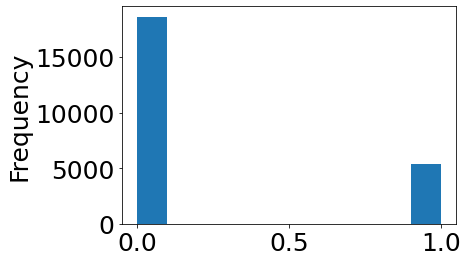

In [5]:
# our target labels are very unballanced
target.plot.hist()

In [6]:
# One hot encode columns which needs to (i.e. SEX, PAY_{i})
features_2 = features_1.copy()
features_2 = pd.get_dummies(features_2, columns=["SEX", "PAY_0", "PAY_2", "PAY_3", "PAY_4","PAY_5", "PAY_6"])
features_2.describe()

ID     LIMIT_BAL     EDUCATION      MARRIAGE           AGE  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean   12000.000000      0.529678      1.847452      1.557232      0.365715   
std     6928.058891      0.204140      0.780004      0.522083      0.190759   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     6000.500000      0.349475      1.000000      1.000000      0.213987   
50%    12000.000000      0.573056      2.000000      2.000000      0.359652   
75%    17999.500000      0.690100      2.000000      2.000000      0.500879   
max    23999.000000      1.000000      6.000000      3.000000      1.000000   

          BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean       0.266536      0.155534      0.186386      0.274559      0.165378   
std        0.074771      0.082062      0.052273      0.068324      0.072948   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.215641      0.099583      0.151067      0.229036      0.116848   
50%        0.237198      0.123376      0.165898      0.248977      0.138724   
75%        0.285807      0.175868      0.198712      0.287957      0.180034   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...      PAY_6_-2      PAY_6_-1       PAY_6_0       PAY_6_2  \
count  ...  23999.000000  23999.000000  23999.000000  23999.000000   
mean   ...      0.159090      0.196758      0.536522      0.096837   
std    ...      0.365768      0.397556      0.498675      0.295742   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      1.000000      0.000000   
75%    ...      0.000000      0.000000      1.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

            PAY_6_3       PAY_6_4       PAY_6_5       PAY_6_6       PAY_6_7  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean       0.006584      0.001542      0.000375      0.000667      0.001542   
std        0.080874      0.039235      0.019362      0.025812      0.039235   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            PAY_6_8  
count  23999.000000  
mean       0.000083  
std        0.009129  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 83 columns]

In [7]:
# Dropping id column as it is not bring any value to our future estimator (right?:)
features_3 = features_2.drop("ID", axis=1)
features_3

LIMIT_BAL  EDUCATION  MARRIAGE       AGE  BILL_AMT1  BILL_AMT2  \
0       0.150507          2         1  0.099020   0.215966   0.099587   
1       0.539582          2         2  0.158634   0.214533   0.097773   
2       0.477112          2         2  0.359652   0.245063   0.113889   
3       0.349475          2         1  0.423354   0.265033   0.157691   
4       0.349475          2         1  0.750900   0.221426   0.102962   
...          ...        ...       ...       ...        ...        ...   
23994   0.238551          2         2  0.129401   0.246237   0.135186   
23995   0.451536          2         1  0.129401   0.302265   0.200513   
23996   0.150507          2         1  0.129401   0.228157   0.115747   
23997   0.000000          2         2  0.158634   0.221733   0.108547   
23998   0.150507          5         2  0.158634   0.235178   0.122010   

       BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  ...  PAY_6_-2  PAY_6_-1  \
0       0.149258   0.226198   0.114502   0.381107  ...         1         0   
1       0.150986   0.230164   0.119157   0.384098  ...         0         0   
2       0.160361   0.243472   0.134528   0.395279  ...         0         0   
3       0.190463   0.260093   0.153033   0.407853  ...         0         0   
4       0.179249   0.251356   0.140099   0.398513  ...         0         0   
...          ...        ...        ...        ...  ...       ...       ...   
23994   0.174750   0.262710   0.153281   0.408063  ...         0         0   
23995   0.216252   0.319868   0.197340   0.425794  ...         0         0   
23996   0.163785   0.247046   0.137412   0.396907  ...         0         0   
23997   0.157154   0.247266   0.136734   0.389497  ...         0         0   
23998   0.165348   0.273752   0.114502   0.381107  ...         1         0   

       PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0            0        0        0        0        0        0        0        0  
1            0        1        0        0        0        0        0        0  
2            1        0        0        0        0        0        0        0  
3            1        0        0        0        0        0        0        0  
4            1        0        0        0        0        0        0        0  
...        ...      ...      ...      ...      ...      ...      ...      ...  
23994        1        0        0        0        0        0        0        0  
23995        1        0        0        0        0        0        0        0  
23996        1        0        0        0        0        0        0        0  
23997        1        0        0        0        0        0        0        0  
23998        0        0        0        0        0        0        0        0  

[23999 rows x 82 columns]

In [8]:
# now I am trying to use klearn logistic model to be moe effective in tuning the model
# before building it form scratch

In [9]:
# try emphesize the recall as a strategy to deal with umbalanced label

# Using F2 metric and trying to grid search hyper params
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    features_3,
    target,
    test_size=0.25,
    random_state=1,
)

ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid = GridSearchCV(
    LogisticRegression(), 
    param_grid={
        "C":np.logspace(-3,3,7), 
        "solver": ['lbfgs', 'liblinear'],
        "penalty":["l1","l2"]
    },
    scoring=ftwo_scorer,
    cv=10,
)
grid.fit(X_train, y_train)
print("tuned hyperparameters : ",grid.best_params_)
print("f2 score:",grid.best_score_)

/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penal

/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penal

/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

tuned hyperparameters :  {'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}
f2 score: 0.3939517135597593


/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Even though f2 is really low

In [11]:
# Anyway fittin gthe model and will look to the results
logistic_reg = LogisticRegression(**{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'})
logistic_reg.fit(X_train, y_train)

/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000.0)

In [12]:
# Accuracy is good enough
y_pred = logistic_reg.predict(X_test)
logistic_reg.score(X_test, y_test)

0.8143333333333334

In [13]:
# Recall for label 1 is very low (0.33)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4431  201]
 [ 913  455]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4632
           1       0.69      0.33      0.45      1368

    accuracy                           0.81      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.81      0.79      6000



(0.0, 1.0)

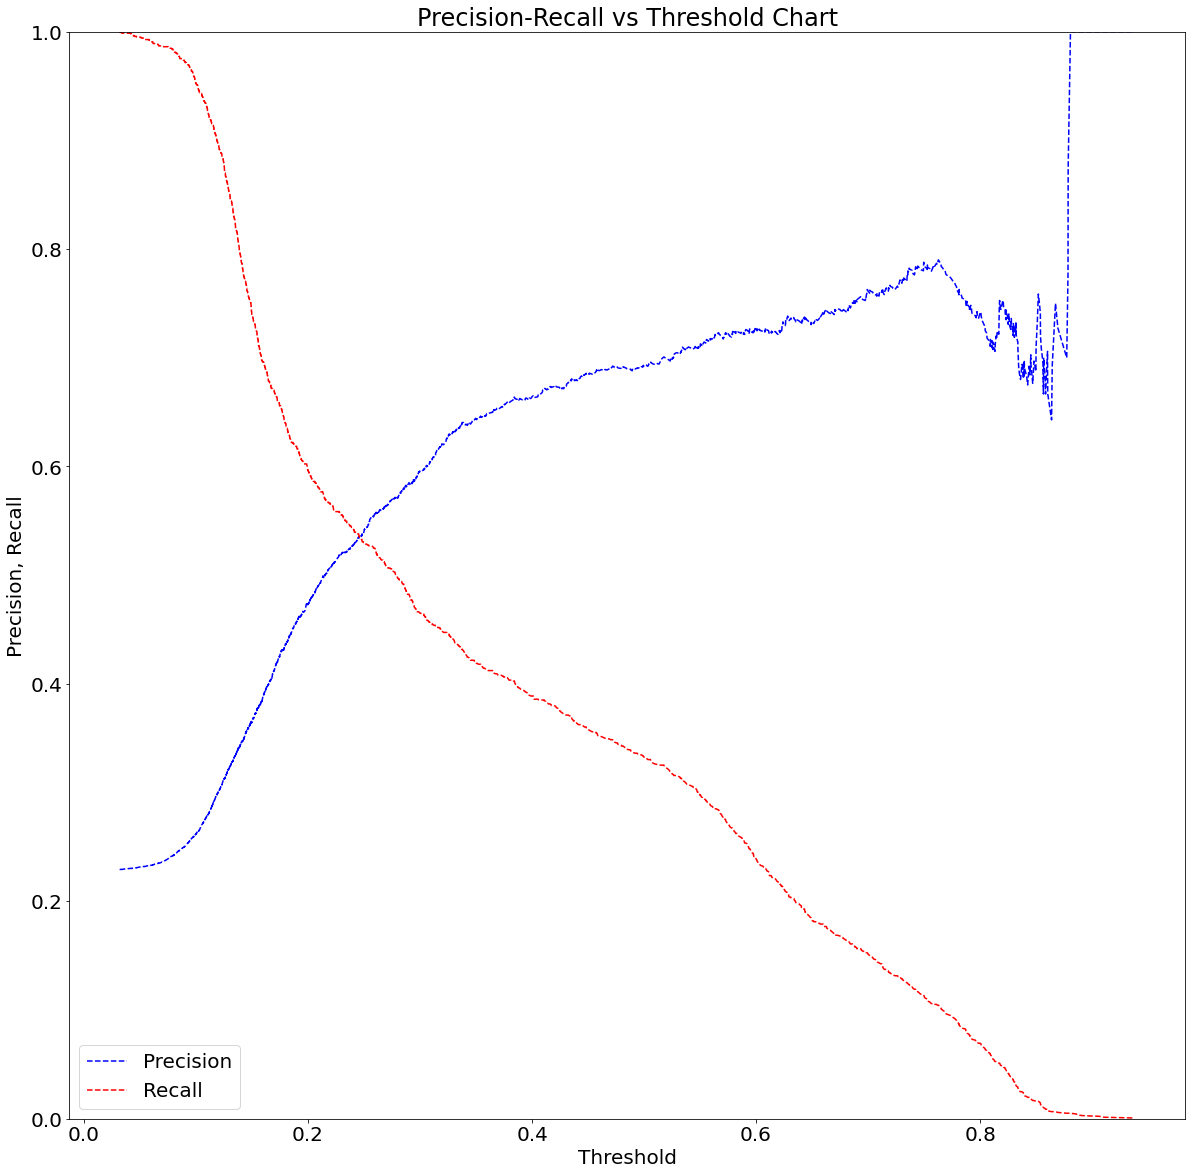

In [14]:
# Trying to get insights about the treshold for our logistics classifier
# In order to improve the recall we need to reduce the treshold to somewhere around 0.3-0.4
plt.rcParams["font.size"] = "20"
fig = plt.figure(figsize=(20, 20))
y_pred=logistic_reg.predict(X_test) 

y_probs=logistic_reg.predict_proba(X_test) 


from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 
1]) 
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [15]:
# sklearn doesn't have this option, so solving his indirectly via using balanced class_weight
# so the classifier will use equal amount of 1 an 0 lables when fitting.
# Result is better in terms of recall
logistic_reg_new = LogisticRegression(C=1000.0, class_weight="balanced", max_iter=1000)
logistic_reg_new.fit(X_train, y_train)
y_pred = logistic_reg_new.predict(X_test)
logistic_reg_new.score(X_test, y_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3897  735]
 [ 600  768]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4632
           1       0.51      0.56      0.54      1368

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# In order to get the feature importance I will use my favourite gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)
gb_clf.score(X_test, y_test)


0.8148333333333333

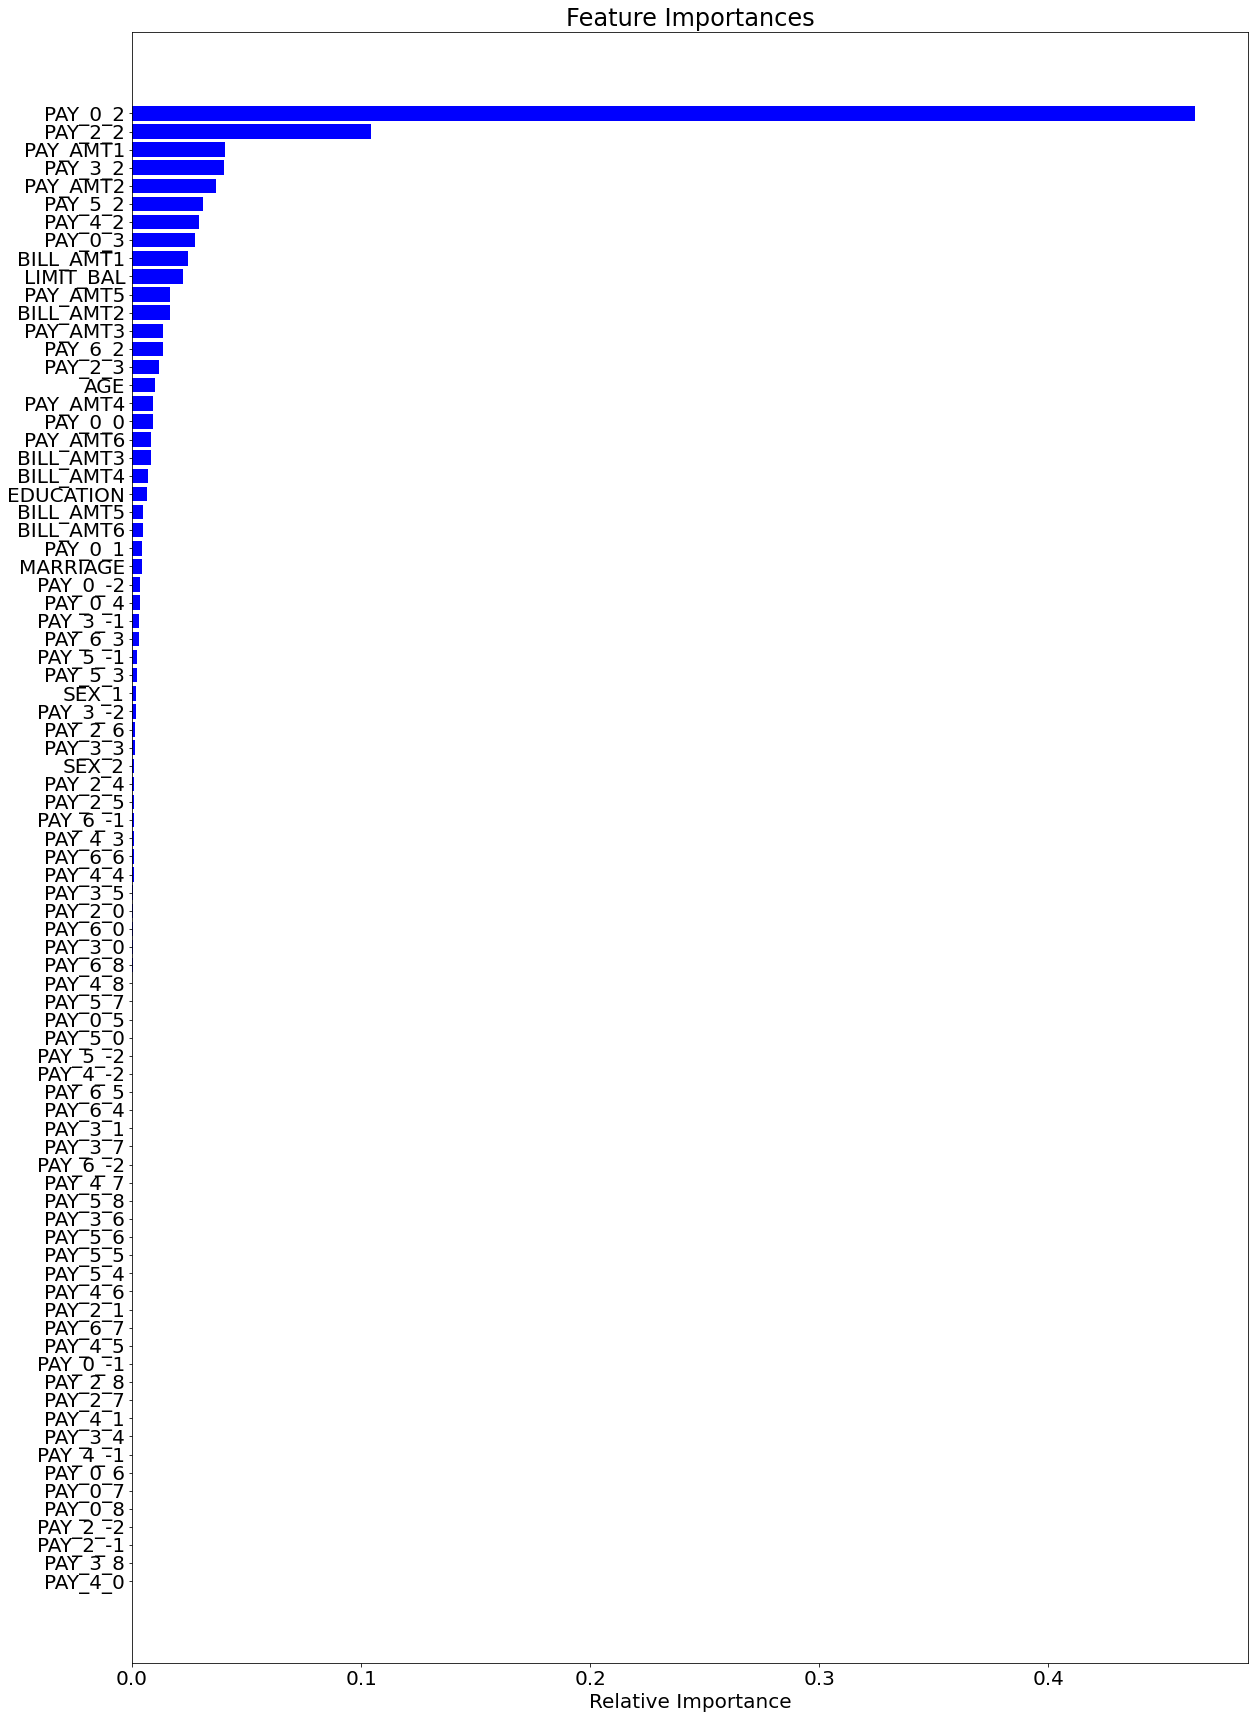

In [17]:
# result is interesting. PAY_2: Repayment status in August, 2005 has the bigest
# sensivity to the target label. Gender, in opposite, has quite a low sensivity.
# Consider these data we could drop some features without compromising the quality
# of our classifier too much.
plt.rcParams["font.size"] = "20"
fig = plt.figure(figsize=(20, 30))

importances = gb_clf.feature_importances_
indices = np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_3.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
# Now I will implement very simple logistic regression

In [19]:
import sys
import logging

import numpy as np


logging.basicConfig(
    format='%(asctime)s [%(levelname)s] %(name)s - %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S',
    stream=sys.stdout,
)


logger = logging.getLogger()


def sigmoid(scores: np.ndarray) -> np.ndarray:
    """Sigmoid function."""
    return 1 / (1 + np.exp(-scores))


def log_likelihood(
    features: np.ndarray, target: np.ndarray, weights: np.ndarray
) -> np.ndarray:
    """Log likelihood."""
    scores = np.dot(features, weights)
    return np.sum(target * scores - np.log(1 + np.exp(scores)))


def logistic_regression(
    features: np.ndarray,
    target: np.ndarray,
    max_iter: int = 5000,
    lr: float = 0.0001,
    report_each: int = 1000,
) -> np.ndarray:
    """Simple logistic regression implementation.

    :param features: array of features
    :param target: array of labels
    :param max_iter: max number of iterations before reporting the final weights
    :param lr: learining rate
    :param report_each: print report
    :return:
    """
    weights = np.zeros(features.shape[1])

    for step in range(max_iter):
        predictions = sigmoid(np.dot(features, weights))
        error = target - predictions
        gradient = np.dot(features.T, error)
        weights += lr * gradient
        if step % report_each == 0:
            logger.info(
                f"Log likelihood is: {log_likelihood(features, target, weights)}"
            )

    return weights


def test_main():
    """Test function."""
    final_weights = logistic_regression(X_train, y_train)
    logger.info(f"Final weights are: {final_weights}")
    y_pred = np.round(sigmoid(np.dot(X_test, final_weights)))
    logger.info(f"Accuracy is: {(y_pred == y_test).sum() / len(y_pred)}")

test_main()

2020-11-22 22:55:50 [INFO] root - Log likelihood is: -18221.106409940006
2020-11-22 22:56:02 [INFO] root - Log likelihood is: -8531.62520505244
2020-11-22 22:56:13 [INFO] root - Log likelihood is: -8520.096661766074
2020-11-22 22:56:23 [INFO] root - Log likelihood is: -8514.167849319821
2020-11-22 22:56:35 [INFO] root - Log likelihood is: -8510.066536678178
2020-11-22 22:56:45 [INFO] root - Final weights are: [-1.4674334  -0.31430233 -0.35158059  0.12108098  0.47355733  0.95737904
 -0.06749466  0.09190241 -0.05626507  0.23206048 -1.9818422  -1.17469786
 -0.84592305 -0.86836926 -1.05116729 -1.19828554  0.284598    0.1331917
 -1.19704098 -0.45064506 -1.39164667 -0.22744148  1.25758209  1.36683858
  0.54339566  0.18259961  0.05723109  0.20688764  0.0700292   0.12874317
 -0.29619395 -0.04395753 -0.39038635  0.01826056  0.09809088 -0.6396078
  0.73926843  0.73467809  0.22799383 -0.15909962 -0.17621041 -0.23700176
 -0.20034091  0.09216967  0.20669226  0.17020381  0.00909272 -0.13880727
  0.2

In [20]:
# At last check the results if I wouldn't apply any data transformations
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.25,
    random_state=1,
)

logistic_reg_new = LogisticRegression(C=1000.0, max_iter=1000)
logistic_reg_new.fit(X_train, y_train)
y_pred = logistic_reg_new.predict(X_test)
logistic_reg_new.score(X_test, y_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4632    0]
 [1368    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4632
           1       0.00      0.00      0.00      1368

    accuracy                           0.77      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.77      0.67      6000



/home/azhukov/.cache/pypoetry/virtualenvs/h2o-assignment-zzoAltWg-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
